In [26]:
!pip install simpletransformers==0.65.1
!pip3 install https://download.pytorch.org/whl/cpu/torch-1.0.1-cp36-cp36m-win_amd64.whl
!pip3 install torchvision


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: torch-1.0.1-cp36-cp36m-win_amd64.whl is not a supported wheel on this platform.


Defaulting to user installation because normal site-packages is not writeable


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [28]:
# Load your local dataset
data = pd.read_csv("C:/Users/anshi/Downloads/TopicAnalysisDataset.csv")

# Encode the categorical labels into numerical labels
le = LabelEncoder()
data['labels'] = le.fit_transform(data['Topic'])

In [29]:
# Assuming your data has a 'text' column for the text data
train, test = train_test_split(data[['Sentences', 'labels']], test_size=0.2, random_state=42, stratify=data[['labels']])

# Use a subset of the training set
train, dev = train_test_split(train, test_size=0.1, random_state=0, stratify=train[['labels']])

In [30]:
# model_args = ClassificationArgs()

# model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
# model_args.evaluate_during_training=True # to perform evaluation while training the model

# model_args.num_train_epochs=10 # number of epochs
# model_args.train_batch_size=32 # batch size
# model_args.learning_rate=4e-6 # learning rate
# model_args.max_seq_length=256 # maximum sequence length

# # Early stopping parameters to prevent overfitting
# model_args.use_early_stopping=True
# model_args.early_stopping=0.01
# model_args.early_stopping_metric='eval_loss'
# model_args.early_stopping_metric_minimize=True
# model_args.early_stopping_patience=2

# model_args.evaluate_during_training_steps=32

model_args = ClassificationArgs()

model_args.overwrite_output_dir=True
model_args.evaluate_during_training=True
model_args.num_train_epochs=10
model_args.train_batch_size=16  # Reduced batch size
model_args.learning_rate=4e-6
model_args.max_seq_length=128  # Reduced max sequence length
model_args.gradient_accumulation_steps = 2  # Added gradient accumulation
model_args.fp16 = True  # Added mixed precision training
model_args.use_early_stopping=True
model_args.early_stopping=0.01
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=32

In [31]:
# Load pre-trained model (roberta)
# Make sure num_labels matches the number of unique labels in your dataset
model = ClassificationModel('roberta', 'roberta-base', num_labels=len(le.classes_), args=model_args, use_cuda=False)

_, history = model.train_model(train, eval_df=dev)
result, model_outputs, wrong_predictions = model.eval_model(dev)
predicted, probabilities = model.predict(test.Sentences.to_list())
test['predicted_roberta'] = predicted

#print(classification_report(test['labels'], test['predicted_roberta']))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:608: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/135 [00:00<?, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/135 [00:00<?, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/135 [00:00<?, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/135 [00:00<?, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/135 [00:00<?, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/135 [00:00<?, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\anshi\AppData\Roaming\Python\Python311\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [32]:
print(classification_report(test['labels'], test['predicted_roberta']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       201
           1       0.99      0.99      0.99       200
           2       1.00      1.00      1.00       200

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



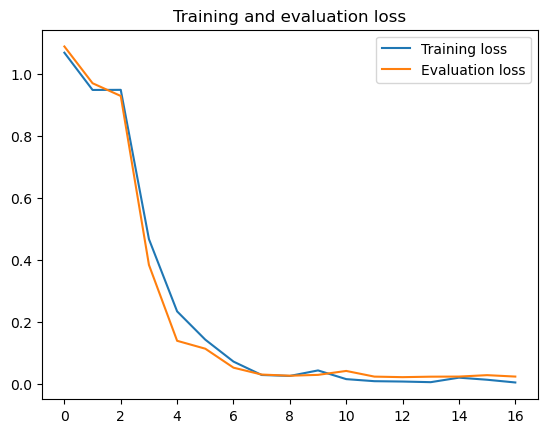

In [33]:
import matplotlib.pyplot as plt

# Plot training and evaluation loss
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()
plt.show()

In [34]:
predicted, probabilities = model.predict(test.Sentences.to_list())
test['predicted'] = predicted

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [35]:
test.head(35)

,Sentences,labels,predicted_roberta,predicted
945,This movie has to be one of the most boring an...,1,1,1
1851,Novak Djokovic remains on course for a 'Golden...,2,2,2
991,I dunno sometimes...you try and try and try to...,1,1,1
2742,Great boot for the price: Just got back from a...,0,0,0
1286,Tyson Fury has been ordered to fight Deontay W...,2,2,2
1290,Nigeria coach Gernot Rohr has invited Shehu Ab...,2,2,2
2771,Hi-Tec Boots Work for Me: Had an older pair th...,0,0,0
348,Most of the comments on this movie are positiv...,1,1,1
1116,"Nigerian international, Alex Iwobi was in exce...",2,2,2
948,i think it is great one of my favourite films ...,1,1,1


In [36]:
# Fill NaN values with an empty string
train['Sentences'].fillna('', inplace=True)
test['Sentences'].fillna('', inplace=True)

# Train a conventional machine learning model (SVM)
pipeline = make_pipeline(TfidfVectorizer(), LinearSVC())
pipeline.fit(train['Sentences'], train['labels'])
predicted = pipeline.predict(test['Sentences'])
test['predicted_svm'] = predicted
print(classification_report(test['labels'], test['predicted_svm']))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       201
           1       0.93      0.94      0.94       200
           2       0.99      0.99      0.99       200

    accuracy                           0.96       601
   macro avg       0.96      0.96      0.96       601
weighted avg       0.96      0.96      0.96       601



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [38]:
# Define a mapping from numerical labels to topic names
label_map = {0: 'movies', 1: 'books', 2: 'sports'}

# Map the numerical labels in 'labels' and 'predicted_svm' to topic names
test['labels'] = test['labels'].map(label_map)
test['predicted_svm'] = test['predicted_svm'].map(label_map)

# Now print the classification report
print(classification_report(test['labels'], test['predicted_svm']))

              precision    recall  f1-score   support

       books       0.93      0.94      0.94       200
      movies       0.94      0.93      0.93       201
      sports       0.99      0.99      0.99       200

    accuracy                           0.96       601
   macro avg       0.96      0.96      0.96       601
weighted avg       0.96      0.96      0.96       601

